## Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market. 

 

### Business Goal 

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market. 

### Data Preparation

There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. You need to consider only company name as the independent variable for model building. 

In [325]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns

In [326]:
cars_df = pd.read_csv('./CarPrice_Assignment.csv')
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [327]:
cars_df.shape

(205, 26)

## STEP 1: Data Preparation and Data Cleaning

### Data Cleaning

In [328]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [329]:
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [330]:
# find the missing value counts in each column
cars_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [331]:
# find the missing value precentage in each column
round(100 * (cars_df.isnull().sum() / len(cars_df.index)), 2)

car_ID              0.0
symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64

In [332]:
# find the total missing value counts of all column
cars_df.isnull().all(axis=0).sum()

0

#### Now I am sure, that there is no missing data in the dataset

### Data Preparation

In [333]:
# Save 'company name' and the 'car model' from the 'CarName' column & create new column for the same.
cars_df['Company_Name'] = cars_df['CarName'].str.split(' ').str[0]
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_Name
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [334]:
cars_df['Company_Name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [335]:
cars_df['Company_Name'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
chevrolet       3
alfa-romero     3
jaguar          3
vw              2
renault         2
maxda           2
porcshce        1
Nissan          1
mercury         1
toyouta         1
vokswagen       1
Name: Company_Name, dtype: int64

### Observations: 
    - Some company names are abbreviated ex: (vw which should be volkswagen)
    - Some company names are misspelled ex: (vokswagen which should be volkswagen, porcshce --> porsche)
    - Some company names are spelled differently ex: (toyouta which should be toyota, mazda should be maxda)
    - Some company names has different cases ex: (nissan, Nissan)
    
### So lets standardise these names

In [336]:
cars_df['Company_Name'] = cars_df['Company_Name'].replace(['vokswagen', 'vw'], 'volkswagen')
cars_df['Company_Name'] = cars_df['Company_Name'].replace(['porcshce'], 'porsche')
cars_df['Company_Name'] = cars_df['Company_Name'].replace(['toyouta'], 'toyota')
cars_df['Company_Name'] = cars_df['Company_Name'].replace(['mazda', 'Mazda'], 'maxda')
cars_df['Company_Name'] = cars_df['Company_Name'].replace(['Nissan'], 'nissan')
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_Name
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [337]:
cars_df['Company_Name'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [338]:
cars_df['Company_Name'].value_counts()

toyota         32
nissan         18
maxda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: Company_Name, dtype: int64

In [339]:
# find the total missing value counts of all column
cars_df.isnull().all(axis=0).sum()

0

## STEP 2: EDA

In [340]:
# our target variable is price, lets have a look at it
cars_df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

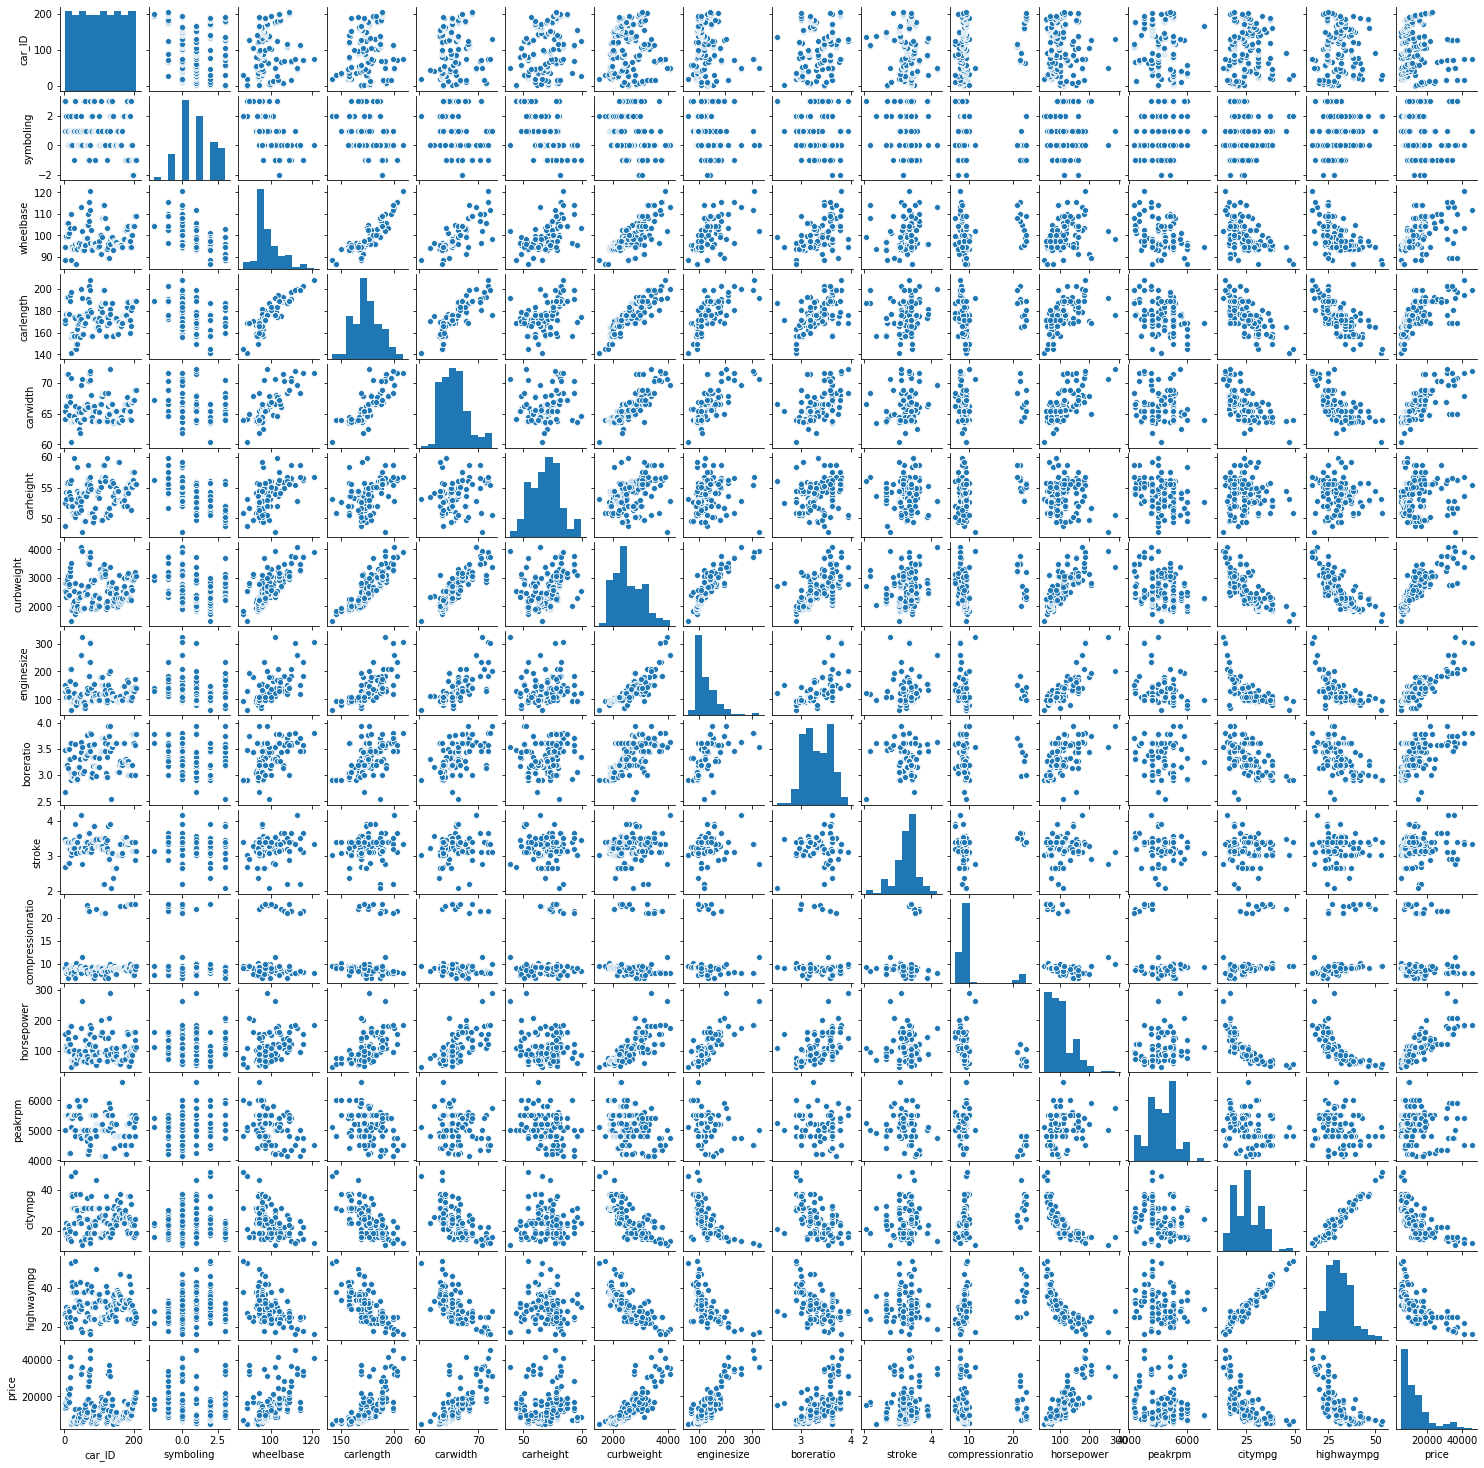

In [341]:
# draw the pair plot of all the variables
pairplot = sns.pairplot(cars_df)
pairplot.fig.set_size_inches(20,20)
plt.show()

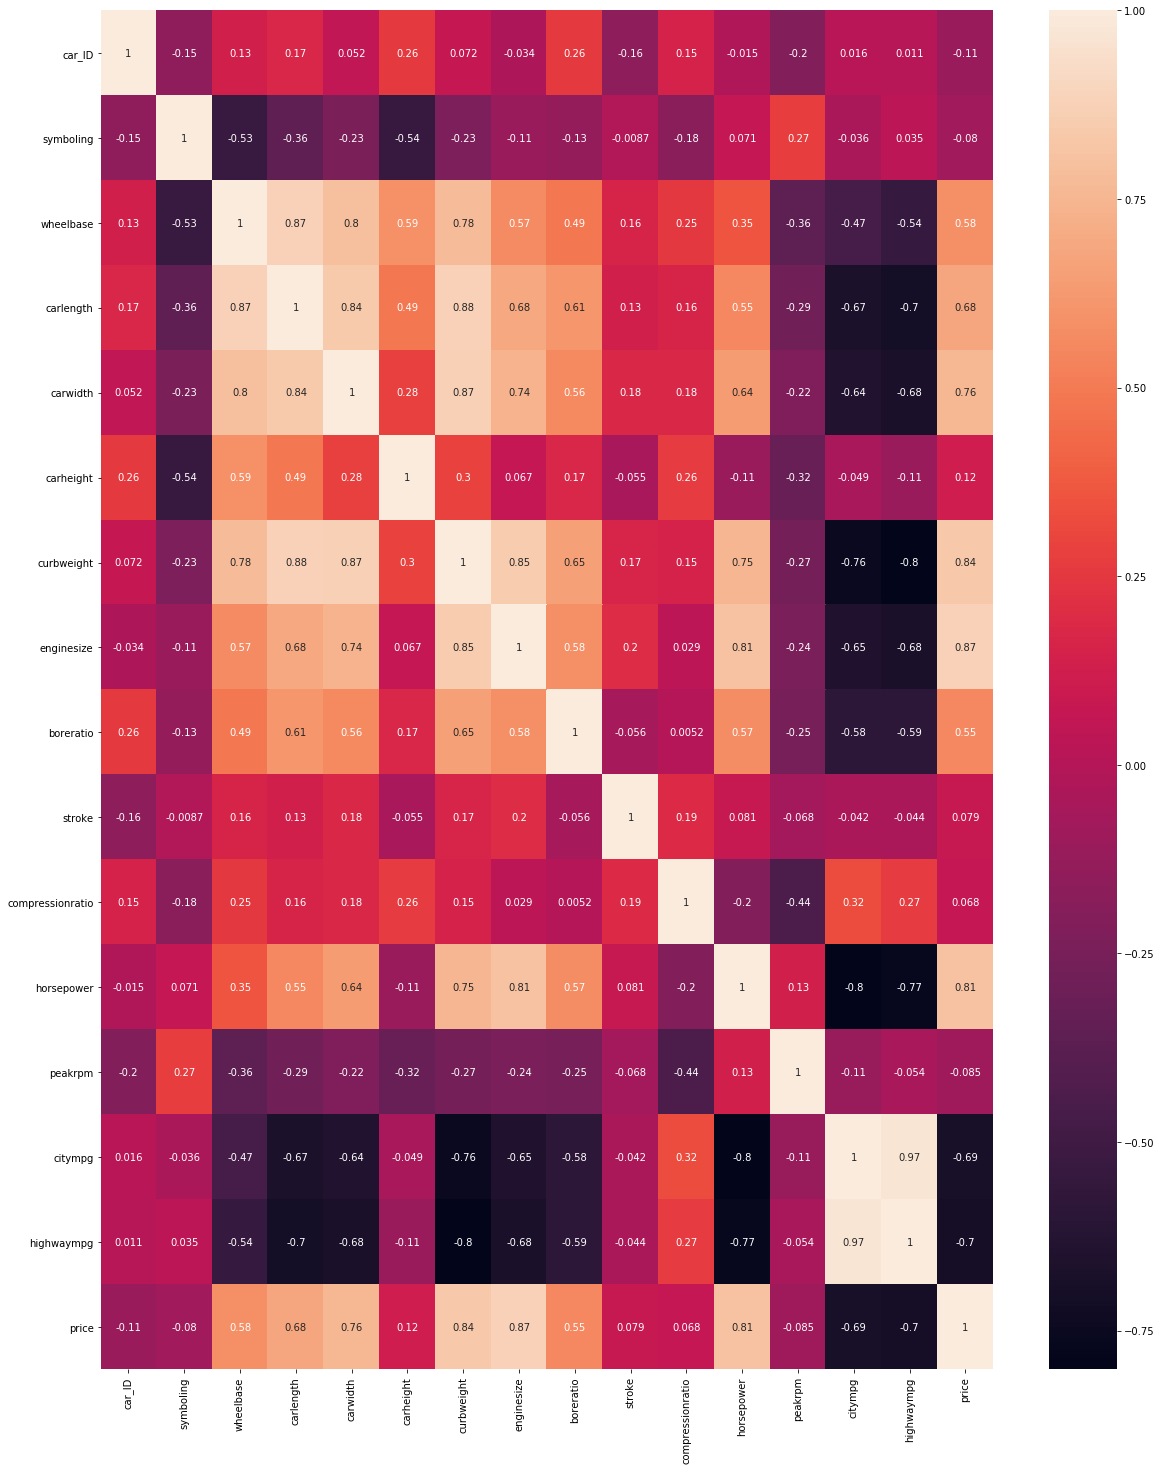

In [342]:
# draw the correlation matrix
plt.figure(figsize = (20, 25))
sns.heatmap(cars_df.corr(), annot = True)
plt.show()

### Observations:
    - Car price is negatively correlated with symboling, peakrpm, citympg and highwaympg.
    - Car price is highly correlated with horsepower, enginesize, curbweight, carwidth.
    - Also price shows good correlation with carlength, wheelbase, boreratio.
    - price of the car shows very less correlation with compressionratio, stroke, carheight, symboling.

In [343]:
sorted(cars_df.columns.tolist())

['CarName',
 'Company_Name',
 'aspiration',
 'boreratio',
 'car_ID',
 'carbody',
 'carheight',
 'carlength',
 'carwidth',
 'citympg',
 'compressionratio',
 'curbweight',
 'cylindernumber',
 'doornumber',
 'drivewheel',
 'enginelocation',
 'enginesize',
 'enginetype',
 'fuelsystem',
 'fueltype',
 'highwaympg',
 'horsepower',
 'peakrpm',
 'price',
 'stroke',
 'symboling',
 'wheelbase']

In [344]:
# plt.figure(figsize=(15, 7))
# sns.lineplot(x='Company_Name', y='price', data=cars_df, estimator=np.median)
# plt.xticks(rotation=90)
# plt.show()

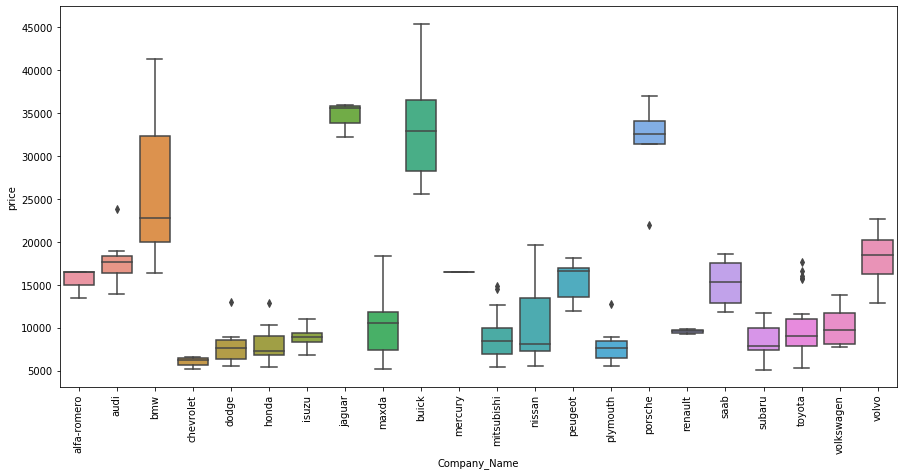

In [345]:
plt.figure(figsize=(15, 7))
sns.boxplot(x='Company_Name', y='price', data=cars_df)
plt.xticks(rotation=90)
plt.show()

In [346]:
cars_pt = cars_df.pivot_table(index="Company_Name", values="price", aggfunc={np.median, np.mean})
cars_pt

,mean,median
Company_Name,,
alfa-romero,15498.333333,16500.0
audi,17859.166714,17710.0
bmw,26118.750000,22835.0
buick,33647.000000,32892.0
chevrolet,6007.000000,6295.0
dodge,7875.444444,7609.0
honda,8184.692308,7295.0
isuzu,8916.500000,8916.5
jaguar,34600.000000,35550.0


### Categorical Variables:
- fueltype
- aspiration
- doornumber
- carbody
- drivewheel
- enginelocation
- enginetype
- cylindernumber
- fuelsystem

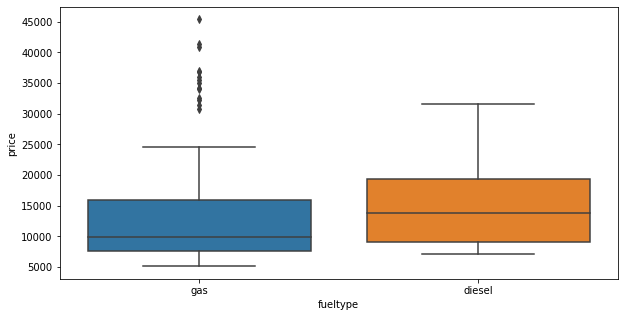

In [347]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='fueltype', y = 'price', data = cars_df)
plt.show()

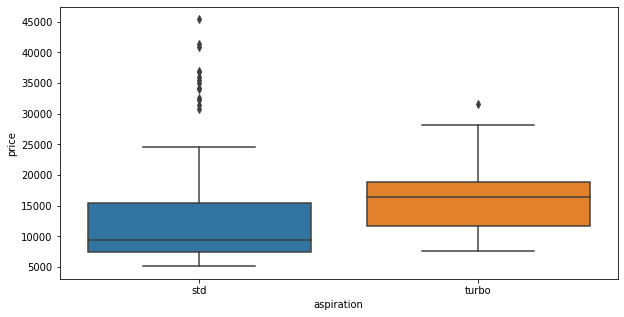

In [348]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='aspiration', y = 'price', data = cars_df)
plt.show()

In [349]:
def drawBoxPlot(column, df):
    print("VARIABLE: ", column)
    plt.figure(figsize=(10, 5))
    plt.xticks(rotation=90)
    sns.boxplot(x=column, y = 'price', data = df)
    plt.show()
    print(column, " -- ", len(df[column].unique()),  " : ", df[column].unique())
    print("---------------------------------------------------------------------------------", end="\n\n\n")

VARIABLE:  fueltype


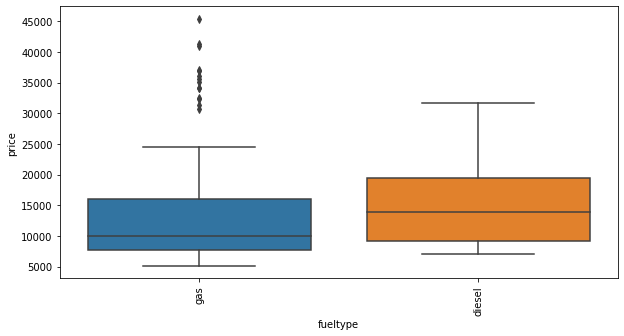

fueltype  --  2  :  ['gas' 'diesel']
---------------------------------------------------------------------------------


VARIABLE:  aspiration


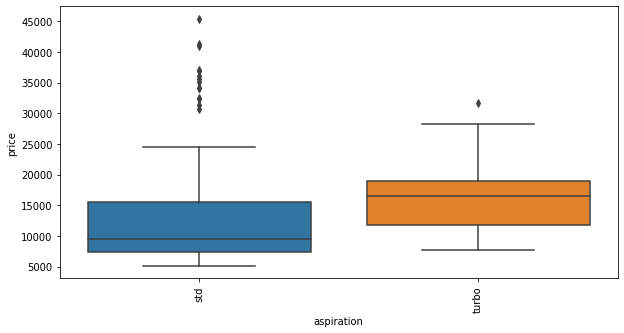

aspiration  --  2  :  ['std' 'turbo']
---------------------------------------------------------------------------------


VARIABLE:  doornumber


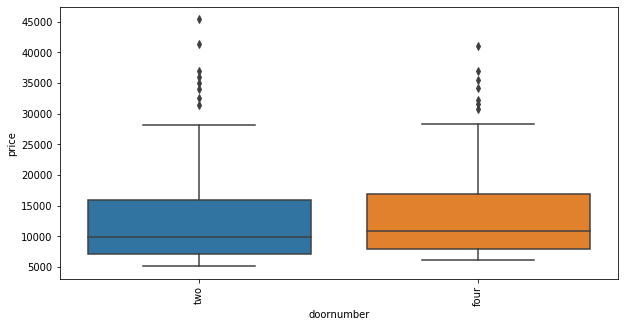

doornumber  --  2  :  ['two' 'four']
---------------------------------------------------------------------------------


VARIABLE:  carbody


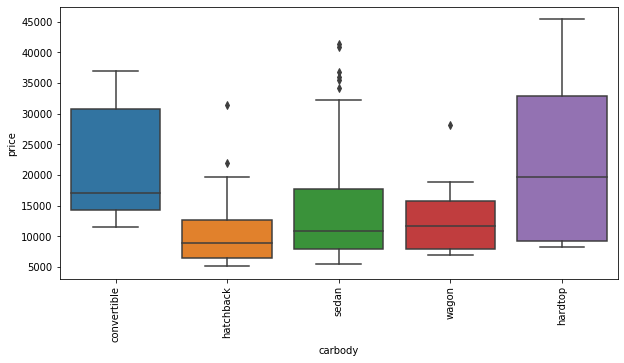

carbody  --  5  :  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
---------------------------------------------------------------------------------


VARIABLE:  drivewheel


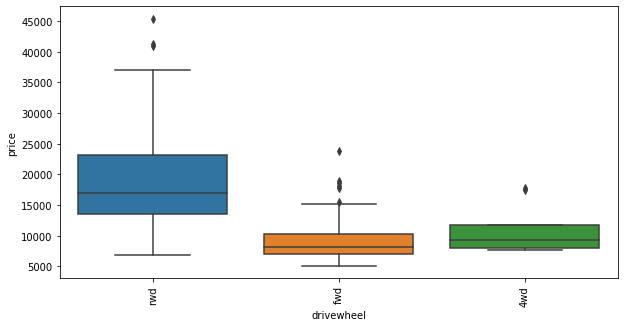

drivewheel  --  3  :  ['rwd' 'fwd' '4wd']
---------------------------------------------------------------------------------


VARIABLE:  enginelocation


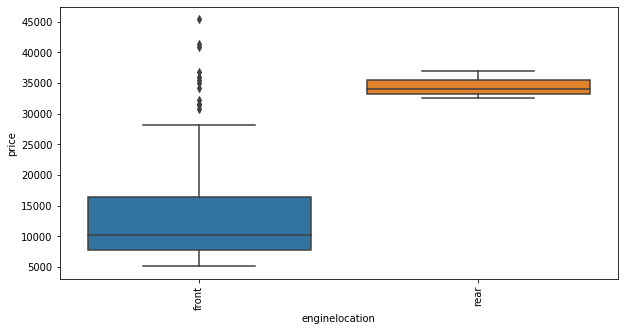

enginelocation  --  2  :  ['front' 'rear']
---------------------------------------------------------------------------------


VARIABLE:  enginetype


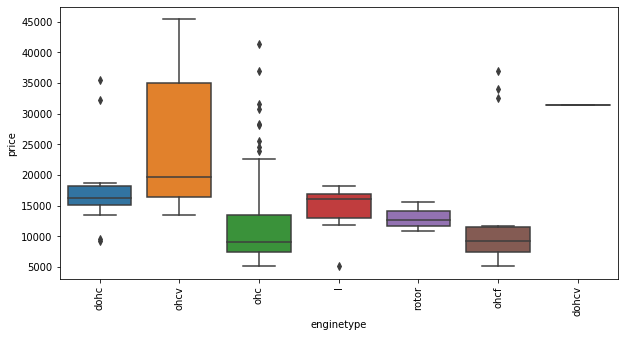

enginetype  --  7  :  ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
---------------------------------------------------------------------------------


VARIABLE:  cylindernumber


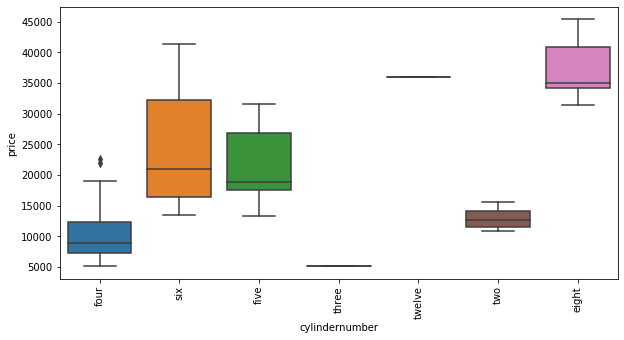

cylindernumber  --  7  :  ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
---------------------------------------------------------------------------------


VARIABLE:  fuelsystem


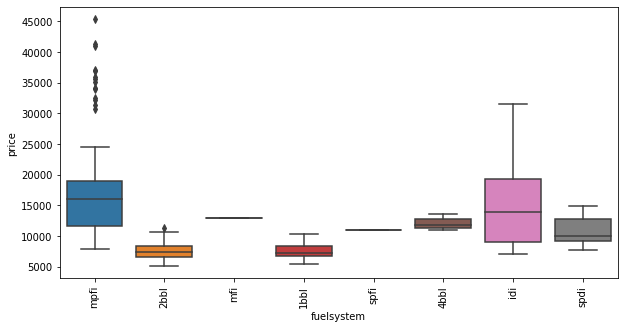

fuelsystem  --  8  :  ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
---------------------------------------------------------------------------------




In [350]:
categorical_vars = ["fueltype", "aspiration", "doornumber", "carbody", "drivewheel", "enginelocation", "enginetype", "cylindernumber", "fuelsystem"]

for col in categorical_vars:
    drawBoxPlot(col, cars_df)

### let us create a dummy columns for fueltype, aspiration, doornumber, enginelocaltion variables

In [351]:
# first lets map the values to 0 or 1
cars_df['fueltype'] = cars_df['fueltype'].map({'diesel':0, 'gas':1})
cars_df['aspiration'] = cars_df['aspiration'].map({'turbo':0, 'std':1})
cars_df['doornumber'] = cars_df['doornumber'].map({'two':0, 'four':1})
cars_df['enginelocation'] = cars_df['enginelocation'].map({'rear':0, 'front':1})


In [352]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

In [353]:
# Assigning dummy variables to ['drivewheel', 'carbody','enginetype', 'cylindernumber', 'fuelsystem'] columns
cars_df = pd.get_dummies(cars_df, columns=['drivewheel','carbody', 'enginetype', 'cylindernumber', 'fuelsystem'], drop_first = True)
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_Name,drivewheel_fwd,drivewheel_rwd,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,1,1,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [354]:
cars_df.shape

(205, 47)

### Numerical Variables:
- carlength
- carwidth
- wheelbase
- crubweight
- horsepower
- enginesize
- highwaympg
- citympg

### From Correlation heat-map we know

    - carlength is highly correlated with carwidth (corr of 0.84).
    - carlength is highly correlated with wheelbase (corr of 0.87).
    - carwidth is highly correlated with crubweight (corr of 0.87).
    - crubweight is highly correlated with horsepower (corr of 0.75).
    - horsepower is highly correlated with enginesize (corr of 0.81).
    - highwaympg is highly correlated with citympg (corr of 0.97).

### Analysis:
As our target variable is price, and these (numerical variables) shows high correlation with each other.
If we inlcude these in our model, we will have multicolinearity as the one of the major problem.
We need to remove these multicolinearity.

_ALSO WE KNOW (from observation analyzing correlation heatmap)_:

    - Car price is negatively correlated with symboling, peakrpm, citympg and highwaympg.
    - Car price is highly correlated with horsepower, enginesize, curbweight, carwidth.
    - Also price shows good correlation with carlength, wheelbase, boreratio.
    - price of the car shows very less correlation with compressionratio, stroke, carheight, symboling.
    
    
#### 1. Hence we can drop those numerical variables which are highly correlated to that variable which is highlt correlated with price.

we can drop **carwidth', 'carlength'** columns.

#### 2. We can drop those numerical variables which are highly correlated with each other but are low correlated with price

we can drop **'highwaympg', 'citympg'** columns.

In [355]:
# dropping columns mentioned above
cars_df.drop(labels=['carwidth', 'carlength', 'citympg', 'highwaympg'], axis = 1, inplace=True)
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,Company_Name,drivewheel_fwd,drivewheel_rwd,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,alfa-romero giulia,1,1,0,1,88.6,48.8,2548,130,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,1,1,0,1,88.6,48.8,2548,130,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,1,1,0,1,94.5,52.4,2823,152,2.68,3.47,9.0,154,5000,16500.0,alfa-romero,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,1,1,1,1,99.8,54.3,2337,109,3.19,3.40,10.0,102,5500,13950.0,audi,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,1,1,1,1,99.4,54.3,2824,136,3.19,3.40,8.0,115,5500,17450.0,audi,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [356]:
cars_df.shape

(205, 43)

#### As we know Insurance of the car plays a majaor role in how people think of the car
In our dataset it is shown with **'Symboling'** variable.
It assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably prety safe.

Hence categorizing all cars into 3 categories such as 
- 'Low_Risk' - Symboling value in range (2, 3),
- 'Moderate_Risk' - Symboling value in range (-1, 1), 
- 'High_Risk' - Symboling value in range (-3, -2)

In [357]:
labels = ['Low_Risk', 'Moderate_Risk', 'High_Risk']
bins = [-3, -2, 2, 3]

cars_df = cars_df.join(pd.get_dummies(pd.cut(cars_df['symboling'], bins, labels=labels), drop_first=True))
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,Company_Name,drivewheel_fwd,drivewheel_rwd,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,Moderate_Risk,High_Risk
0,1,3,alfa-romero giulia,1,1,0,1,88.6,48.8,2548,130,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,2,3,alfa-romero stelvio,1,1,0,1,88.6,48.8,2548,130,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,3,1,alfa-romero Quadrifoglio,1,1,0,1,94.5,52.4,2823,152,2.68,3.47,9.0,154,5000,16500.0,alfa-romero,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,4,2,audi 100 ls,1,1,1,1,99.8,54.3,2337,109,3.19,3.40,10.0,102,5500,13950.0,audi,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,5,2,audi 100ls,1,1,1,1,99.4,54.3,2824,136,3.19,3.40,8.0,115,5500,17450.0,audi,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [358]:
cars_df.shape

(205, 45)

### Creating derived variables according to the price of the car, which indicates the class of the car

In [359]:
cars_df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [360]:
# cars prices according to the company
cars_df.groupby('Company_Name')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
Company_Name,,,,,,,,
alfa-romero,3.0,15498.333333,1734.937559,13495.0,14997.500,16500.0,16500.0000,16500.0
audi,7.0,17859.166714,3151.576876,13950.0,16350.000,17710.0,18389.5835,23875.0
bmw,8.0,26118.750000,9263.832033,16430.0,19958.750,22835.0,32290.0000,41315.0
buick,8.0,33647.000000,6789.560306,25552.0,28230.000,32892.0,36532.0000,45400.0
chevrolet,3.0,6007.000000,754.421633,5151.0,5723.000,6295.0,6435.0000,6575.0
dodge,9.0,7875.444444,2213.386044,5572.0,6377.000,7609.0,8558.0000,12964.0
honda,13.0,8184.692308,2061.672112,5399.0,6855.000,7295.0,9095.0000,12945.0
isuzu,4.0,8916.500000,1740.362462,6785.0,8383.625,8916.5,9449.3750,11048.0
jaguar,3.0,34600.000000,2047.559523,32250.0,33900.000,35550.0,35775.0000,36000.0


In [361]:
car_categories = ['Economic', 'Midtier', 'Luxury']
bins = [0, 10000, 20000, 50000]

cars_df = cars_df.join(pd.get_dummies(pd.cut(cars_df['price'], bins, labels=car_categories), drop_first=True))
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,price,Company_Name,drivewheel_fwd,drivewheel_rwd,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,Moderate_Risk,High_Risk,Midtier,Luxury
0,1,3,alfa-romero giulia,1,1,0,1,88.6,48.8,2548,130,3.47,2.68,9.0,111,5000,13495.0,alfa-romero,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
1,2,3,alfa-romero stelvio,1,1,0,1,88.6,48.8,2548,130,3.47,2.68,9.0,111,5000,16500.0,alfa-romero,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
2,3,1,alfa-romero Quadrifoglio,1,1,0,1,94.5,52.4,2823,152,2.68,3.47,9.0,154,5000,16500.0,alfa-romero,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,4,2,audi 100 ls,1,1,1,1,99.8,54.3,2337,109,3.19,3.40,10.0,102,5500,13950.0,audi,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
4,5,2,audi 100ls,1,1,1,1,99.4,54.3,2824,136,3.19,3.40,8.0,115,5500,17450.0,audi,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [362]:
cars_df.shape

(205, 47)

### Remove unecessory columns

In [363]:
var_to_drop = ['car_ID', 'CarName', 'Company_Name']
cars_df.drop(labels = var_to_drop, axis = 1, inplace = True)

## STEP 3: BUILDING THE MODEL

In [364]:
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [365]:
import statsmodels.api as sm

In [366]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

### CheckPoint 3.1: Split the data into Train and Test sets

In [367]:
# We will divide the data into 70/30 % to train and test data respectively.
cars_df_train, cars_df_test = train_test_split(cars_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [368]:
sorted(cars_df.columns.tolist())

['High_Risk',
 'Luxury',
 'Midtier',
 'Moderate_Risk',
 'aspiration',
 'boreratio',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'carheight',
 'compressionratio',
 'curbweight',
 'cylindernumber_five',
 'cylindernumber_four',
 'cylindernumber_six',
 'cylindernumber_three',
 'cylindernumber_twelve',
 'cylindernumber_two',
 'doornumber',
 'drivewheel_fwd',
 'drivewheel_rwd',
 'enginelocation',
 'enginesize',
 'enginetype_dohcv',
 'enginetype_l',
 'enginetype_ohc',
 'enginetype_ohcf',
 'enginetype_ohcv',
 'enginetype_rotor',
 'fuelsystem_2bbl',
 'fuelsystem_4bbl',
 'fuelsystem_idi',
 'fuelsystem_mfi',
 'fuelsystem_mpfi',
 'fuelsystem_spdi',
 'fuelsystem_spfi',
 'fueltype',
 'horsepower',
 'peakrpm',
 'price',
 'stroke',
 'symboling',
 'wheelbase']

In [369]:
# lets scale the data
scaler = MinMaxScaler()
numerical_vars = ['boreratio', 'carheight', 'compressionratio', 'curbweight','enginesize', 'horsepower', 'peakrpm', 'price', 'stroke', 'wheelbase']

In [370]:
cars_df_train[numerical_vars] = scaler.fit_transform(cars_df_train[numerical_vars])

/home/niranjan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/niranjan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [371]:
# remove the target variable from training dataset
y_train = cars_df_train.pop('price')
X_train = cars_df_train

In [372]:
X_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,drivewheel_fwd,drivewheel_rwd,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,Moderate_Risk,High_Risk,Midtier,Luxury
122,1,1,1,1,1,0.244828,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,0.551020,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
125,3,1,1,0,1,0.272414,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,0.551020,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
166,1,1,1,0,1,0.272414,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,1.000000,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,3,1,1,0,1,0.068966,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,0.346939,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0
199,-1,1,0,1,1,0.610345,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,0.387755,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [373]:
X_train.shape

(143, 43)

#### As we have 46 variables to consider we will run RFE to select the best predictor variables.

In [374]:
# instantiate Linear Regression Model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [375]:
# Running RFE with 15 predictor variables.
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [376]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('symboling', False, 21),
 ('fueltype', False, 4),
 ('aspiration', False, 13),
 ('doornumber', False, 27),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carheight', False, 22),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 5),
 ('stroke', True, 1),
 ('compressionratio', False, 12),
 ('horsepower', True, 1),
 ('peakrpm', False, 16),
 ('drivewheel_fwd', False, 20),
 ('drivewheel_rwd', False, 19),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('enginetype_dohcv', False, 3),
 ('enginetype_l', False, 9),
 ('enginetype_ohc', False, 2),
 ('enginetype_ohcf', False, 8),
 ('enginetype_ohcv', False, 15),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', False, 24),
 ('cylindernumber_four', False, 6),
 ('cylindernumber_six', False, 10),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', True, 1),
 ('fuelsystem_2bbl', False, 25),


In [377]:
# Columns that RFE supports - 
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'curbweight', 'enginesize', 'stroke',
       'horsepower', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_rotor', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'Luxury'],
      dtype='object')

In [378]:
# Columns the are rejected by RFE
X_train.columns[~rfe.support_]

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carheight',
       'boreratio', 'compressionratio', 'peakrpm', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'fuelsystem_2bbl',
       'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi',
       'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi',
       'Moderate_Risk', 'High_Risk', 'Midtier'],
      dtype='object')

### CheckPoint 3.2: Building the model

### Model 1:

In [379]:
# Lets now create a data set only with RFE supported columns.
X_train_model1 = X_train[col]

# add constant as we are using statsmodel
X_train_lm = sm.add_constant(X_train_model1)

# run model
lm_1 = sm.OLS(y_train, X_train_lm).fit() 

# Summary of the linear model
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     132.0
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           7.47e-69
Time:                        23:21:20   Log-Likelihood:                 212.64
No. Observations:                 143   AIC:                            -395.3
Df Residuals:                     128   BIC:                            -350.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2522      0.084      2.985      0.003       0.085       0.419
enginelocation           -0.2234      0.077     -2.915      0.004      -0.375      -0.072
wheelbase                 0.0955      0.056      1.699      0.092      -0.016       0.207
curbweight                0.2824      0.089      3.171      0.002       0.106       0.459
enginesize                0.1612      0.112      1.443      0.152      -0.060       0.382
stroke                    0.0003      0.036      0.007      0.994      -0.071       0.072
horsepower                0.3088      0.067      4.627      0.000       0.177       0.441
carbody_hardtop          -0.1229      0.054     -2.288      0.024      -0.229      -0.017
carbody_hatchback        -0.1228      0.035     -3.463      0.001      -0.193      -0.053
carbody_sedan            -0.1013      0.036     -2.833      0.005      -0.172      -0.031
carbody_wagon            -0.1326      0.037     -3.597      0.000      -0.205      -0.060
enginetype_rotor          0.0481      0.018      2.638      0.009       0.012       0.084
cylindernumber_three      0.0889      0.059      1.497      0.137      -0.029       0.206
cylindernumber_twelve    -0.0666      0.075     -0.883      0.379      -0.216       0.083
cylindernumber_two        0.0481      0.018      2.638      0.009       0.012       0.084
Luxury                    0.2354      0.021     11.309      0.000       0.194       0.277
==============================================================================
Omnibus:                       65.017   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              342.319
Skew:                           1.528   Prob(JB):                     4.64e-75
Kurtosis:                       9.936   Cond. No.                     6.55e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Observations:
- Rsquare value is pretty good at 0.93
- Adj. R-squared value is also very good at 0.928
- P-value of wheelbase, stroke, cylindernumber_twelve, cylindernumber_three, enginesize is high
- Some predictive variables have negative coeficient


In [380]:
# Calculate VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train_model1.columns

vif['VIF'] = [variance_inflation_factor(X_train_model1.values, i) for i in range(X_train_model1.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/home/niranjan/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
10,enginetype_rotor,inf
13,cylindernumber_two,inf
2,curbweight,71.087097
3,enginesize,43.470599
0,enginelocation,41.919338
1,wheelbase,26.718165
8,carbody_sedan,21.129790
4,stroke,17.346771
7,carbody_hatchback,15.251389
5,horsepower,15.013481


#### P-value of 'stroke' is too high
- we will drop this variable and build new model
- VIF of less than 5 we are aiming for.

### Model 2:

In [381]:
X_train_model2 = X_train_model1.drop(["stroke"], axis = 1)

In [382]:
# Model 2

# add constant as we are using statsmodel
X_train_lm = sm.add_constant(X_train_model2)

# run model
lm_2 = sm.OLS(y_train, X_train_lm).fit() 

# Summary of the linear model
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     143.3
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           6.11e-70
Time:                        23:21:21   Log-Likelihood:                 212.64
No. Observations:                 143   AIC:                            -397.3
Df Residuals:                     129   BIC:                            -355.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2521      0.084      2.998      0.003       0.086       0.419
enginelocation           -0.2233      0.076     -2.948      0.004      -0.373      -0.073
wheelbase                 0.0955      0.056      1.707      0.090      -0.015       0.206
curbweight                0.2824      0.089      3.183      0.002       0.107       0.458
enginesize                0.1615      0.106      1.529      0.129      -0.047       0.370
horsepower                0.3086      0.065      4.751      0.000       0.180       0.437
carbody_hardtop          -0.1228      0.053     -2.335      0.021      -0.227      -0.019
carbody_hatchback        -0.1227      0.034     -3.602      0.000      -0.190      -0.055
carbody_sedan            -0.1013      0.035     -2.917      0.004      -0.170      -0.033
carbody_wagon            -0.1325      0.036     -3.653      0.000      -0.204      -0.061
enginetype_rotor          0.0482      0.018      2.680      0.008       0.013       0.084
cylindernumber_three      0.0889      0.059      1.503      0.135      -0.028       0.206
cylindernumber_twelve    -0.0668      0.071     -0.937      0.351      -0.208       0.074
cylindernumber_two        0.0482      0.018      2.680      0.008       0.013       0.084
Luxury                    0.2354      0.021     11.476      0.000       0.195       0.276
==============================================================================
Omnibus:                       65.009   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              342.276
Skew:                           1.528   Prob(JB):                     4.74e-75
Kurtosis:                       9.936   Cond. No.                     7.32e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.62e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [383]:
# Calculate VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train_model2.columns

vif['VIF'] = [variance_inflation_factor(X_train_model2.values, i) for i in range(X_train_model2.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/home/niranjan/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
9,enginetype_rotor,inf
12,cylindernumber_two,inf
2,curbweight,71.086931
0,enginelocation,39.498969
3,enginesize,39.135163
1,wheelbase,26.698322
7,carbody_sedan,19.936924
4,horsepower,14.330227
6,carbody_hatchback,14.076878
8,carbody_wagon,6.097700


### Observations:
- Rsquare and Adj. Rsquare values increased the little bit
- P-value of 'cylindernumber_twelve' is high, hence is insignificant to the model

let us remove this and build new model

### Model 3:

In [384]:
# Model 3
X_train_model3 = X_train_model2.drop(["cylindernumber_twelve"], axis = 1)

# add constant as we are using statsmodel
X_train_lm = sm.add_constant(X_train_model3)

# run model
lm_3 = sm.OLS(y_train, X_train_lm).fit() 

# Summary of the linear model
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     155.3
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           7.39e-71
Time:                        23:21:21   Log-Likelihood:                 212.15
No. Observations:                 143   AIC:                            -398.3
Df Residuals:                     130   BIC:                            -359.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2661      0.083      3.216      0.002       0.102       0.430
enginelocation          -0.2321      0.075     -3.089      0.002      -0.381      -0.083
wheelbase                0.1000      0.056      1.795      0.075      -0.010       0.210
curbweight               0.3008      0.086      3.480      0.001       0.130       0.472
enginesize               0.1157      0.094      1.236      0.219      -0.069       0.301
horsepower               0.3083      0.065      4.748      0.000       0.180       0.437
carbody_hardtop         -0.1251      0.052     -2.383      0.019      -0.229      -0.021
carbody_hatchback       -0.1257      0.034     -3.707      0.000      -0.193      -0.059
carbody_sedan           -0.1056      0.034     -3.072      0.003      -0.174      -0.038
carbody_wagon           -0.1387      0.036     -3.890      0.000      -0.209      -0.068
enginetype_rotor         0.0441      0.017      2.530      0.013       0.010       0.079
cylindernumber_three     0.0864      0.059      1.464      0.146      -0.030       0.203
cylindernumber_two       0.0441      0.017      2.530      0.013       0.010       0.079
Luxury                   0.2375      0.020     11.655      0.000       0.197       0.278
==============================================================================
Omnibus:                       69.624   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              392.789
Skew:                           1.634   Prob(JB):                     5.09e-86
Kurtosis:                      10.433   Cond. No.                     3.30e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.74e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [385]:
# Calculate VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train_model3.columns

vif['VIF'] = [variance_inflation_factor(X_train_model3.values, i) for i in range(X_train_model3.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

/home/niranjan/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
9,enginetype_rotor,inf
11,cylindernumber_two,inf
2,curbweight,67.012435
0,enginelocation,39.127550
3,enginesize,30.963442
1,wheelbase,26.646737
7,carbody_sedan,19.855176
4,horsepower,14.330220
6,carbody_hatchback,14.070576
8,carbody_wagon,6.013031


### Observations:
- Rsquare and Adj. Rsquare values are same as prev model
- P-value of 'enginesize' is high, hence is insignificant to the model
- lets first remove the variables with VIF of `inf` and having high --value
- enginetype_rotor	    0.0441	0.013
- cylindernumber_two	0.0441	0.013

let us remove `enginetype_rotor` and build new model

### MODEL 4:

In [386]:
# Model 4
X_train_model4 = X_train_model3.drop(["enginetype_rotor"], axis = 1)

# add constant as we are using statsmodel
X_train_lm = sm.add_constant(X_train_model4)

# run model
lm_4 = sm.OLS(y_train, X_train_lm).fit() 

# Summary of the linear model
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     155.3
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           7.39e-71
Time:                        23:21:23   Log-Likelihood:                 212.15
No. Observations:                 143   AIC:                            -398.3
Df Residuals:                     130   BIC:                            -359.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2661      0.083      3.216      0.002       0.102       0.430
enginelocation          -0.2321      0.075     -3.089      0.002      -0.381      -0.083
wheelbase                0.1000      0.056      1.795      0.075      -0.010       0.210
curbweight               0.3008      0.086      3.480      0.001       0.130       0.472
enginesize               0.1157      0.094      1.236      0.219      -0.069       0.301
horsepower               0.3083      0.065      4.748      0.000       0.180       0.437
carbody_hardtop         -0.1251      0.052     -2.383      0.019      -0.229      -0.021
carbody_hatchback       -0.1257      0.034     -3.707      0.000      -0.193      -0.059
carbody_sedan           -0.1056      0.034     -3.072      0.003      -0.174      -0.038
carbody_wagon           -0.1387      0.036     -3.890      0.000      -0.209      -0.068
cylindernumber_three     0.0864      0.059      1.464      0.146      -0.030       0.203
cylindernumber_two       0.0883      0.035      2.530      0.013       0.019       0.157
Luxury                   0.2375      0.020     11.655      0.000       0.197       0.278
==============================================================================
Omnibus:                       69.624   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              392.789
Skew:                           1.634   Prob(JB):                     5.09e-86
Kurtosis:                      10.433   Cond. No.                         43.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [387]:
# Calculate VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train_model4.columns

vif['VIF'] = [variance_inflation_factor(X_train_model4.values, i) for i in range(X_train_model4.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,67.012435
0,enginelocation,39.127550
3,enginesize,30.963442
1,wheelbase,26.646737
7,carbody_sedan,19.855176
4,horsepower,14.330220
6,carbody_hatchback,14.070576
8,carbody_wagon,6.013031
11,Luxury,2.466221
10,cylindernumber_two,1.469872


### Observations:
- Rsquare and Adj. Rsquare values are good
- P-value of 'cylindernumber_three' is max among these variables

let us try removing this, and build new model

### Model 5:

In [388]:
# Model 5
X_train_model5 = X_train_model4.drop(["cylindernumber_three"], axis = 1)

# add constant as we are using statsmodel
X_train_lm = sm.add_constant(X_train_model5)

# run model
lm_5 = sm.OLS(y_train, X_train_lm).fit() 

# Summary of the linear model
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     167.8
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.60e-71
Time:                        23:21:24   Log-Likelihood:                 210.99
No. Observations:                 143   AIC:                            -398.0
Df Residuals:                     131   BIC:                            -362.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2675      0.083      3.219      0.002       0.103       0.432
enginelocation        -0.2308      0.075     -3.058      0.003      -0.380      -0.081
wheelbase              0.0977      0.056      1.747      0.083      -0.013       0.208
curbweight             0.2982      0.087      3.435      0.001       0.126       0.470
enginesize             0.1116      0.094      1.189      0.237      -0.074       0.297
horsepower             0.3069      0.065      4.706      0.000       0.178       0.436
carbody_hardtop       -0.1250      0.053     -2.371      0.019      -0.229      -0.021
carbody_hatchback     -0.1240      0.034     -3.643      0.000      -0.191      -0.057
carbody_sedan         -0.1054      0.035     -3.051      0.003      -0.174      -0.037
carbody_wagon         -0.1380      0.036     -3.854      0.000      -0.209      -0.067
cylindernumber_two     0.0860      0.035      2.456      0.015       0.017       0.155
Luxury                 0.2404      0.020     11.807      0.000       0.200       0.281
==============================================================================
Omnibus:                       68.820   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              369.755
Skew:                           1.632   Prob(JB):                     5.11e-81
Kurtosis:                      10.170   Cond. No.                         43.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [389]:
# Calculate VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train_model5.columns

vif['VIF'] = [variance_inflation_factor(X_train_model5.values, i) for i in range(X_train_model5.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,66.987575
0,enginelocation,39.002712
3,enginesize,30.936886
1,wheelbase,26.620661
7,carbody_sedan,19.852488
4,horsepower,14.327091
6,carbody_hatchback,14.044498
8,carbody_wagon,6.010744
10,Luxury,2.440791
9,cylindernumber_two,1.466896


### Observations:
- Rsquare and Adj. Rsquare values are good
- P-value of 'enginesize' is max among these variables

let us try removing this, and build new model

### Model 6:

In [390]:
# Model 6
X_train_model6 = X_train_model5.drop(["enginesize"], axis = 1)

# add constant as we are using statsmodel
X_train_lm = sm.add_constant(X_train_model6)

# run model
lm_6 = sm.OLS(y_train, X_train_lm).fit() 

# Summary of the linear model
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     183.8
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           2.31e-72
Time:                        23:21:26   Log-Likelihood:                 210.22
No. Observations:                 143   AIC:                            -398.4
Df Residuals:                     132   BIC:                            -365.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2678      0.083      3.218      0.002       0.103       0.432
enginelocation        -0.2279      0.076     -3.017      0.003      -0.377      -0.078
wheelbase              0.0869      0.055      1.572      0.118      -0.022       0.196
curbweight             0.3519      0.074      4.739      0.000       0.205       0.499
horsepower             0.3348      0.061      5.497      0.000       0.214       0.455
carbody_hardtop       -0.1219      0.053     -2.312      0.022      -0.226      -0.018
carbody_hatchback     -0.1245      0.034     -3.654      0.000      -0.192      -0.057
carbody_sedan         -0.1051      0.035     -3.038      0.003      -0.174      -0.037
carbody_wagon         -0.1431      0.036     -4.019      0.000      -0.214      -0.073
cylindernumber_two     0.0651      0.030      2.147      0.034       0.005       0.125
Luxury                 0.2492      0.019     13.114      0.000       0.212       0.287
==============================================================================
Omnibus:                       68.383   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              368.358
Skew:                           1.618   Prob(JB):                     1.03e-80
Kurtosis:                      10.166   Cond. No.                         41.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [391]:
# Calculate VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train_model6.columns

vif['VIF'] = [variance_inflation_factor(X_train_model6.values, i) for i in range(X_train_model6.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,curbweight,48.576368
0,enginelocation,38.707351
1,wheelbase,25.865711
6,carbody_sedan,19.850899
5,carbody_hatchback,14.041939
3,horsepower,12.461073
7,carbody_wagon,5.909208
9,Luxury,2.113215
4,carbody_hardtop,1.395429
8,cylindernumber_two,1.095715


### Observations:
- Rsquare and Adj. Rsquare decreased a little bit but still values are pretty good
- P-value of 'carbody_hardtop' is max among these variables but its still acceptable
- Also VIF of 'curbweight' is high and above acceptance range

let us try removing this, and build new model

### Model 7:

In [392]:
# Model 7
X_train_model7 = X_train_model6.drop(["curbweight"], axis = 1)

# add constant as we are using statsmodel
X_train_lm = sm.add_constant(X_train_model7)

# run model
lm_7 = sm.OLS(y_train, X_train_lm).fit() 

# Summary of the linear model
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     173.7
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           5.18e-69
Time:                        23:21:28   Log-Likelihood:                 198.98
No. Observations:                 143   AIC:                            -378.0
Df Residuals:                     133   BIC:                            -348.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3229      0.089      3.636      0.000       0.147       0.499
enginelocation        -0.2173      0.081     -2.670      0.009      -0.378      -0.056
wheelbase              0.2979      0.035      8.433      0.000       0.228       0.368
horsepower             0.5618      0.041     13.857      0.000       0.482       0.642
carbody_hardtop       -0.1868      0.055     -3.404      0.001      -0.295      -0.078
carbody_hatchback     -0.1922      0.033     -5.763      0.000      -0.258      -0.126
carbody_sedan         -0.1717      0.034     -5.040      0.000      -0.239      -0.104
carbody_wagon         -0.1886      0.037     -5.105      0.000      -0.262      -0.116
cylindernumber_two     0.0715      0.033      2.192      0.030       0.007       0.136
Luxury                 0.2606      0.020     12.825      0.000       0.220       0.301
==============================================================================
Omnibus:                       46.665   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.412
Skew:                           1.129   Prob(JB):                     6.67e-40
Kurtosis:                       8.018   Cond. No.                         39.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [393]:
# Calculate VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train_model7.columns

vif['VIF'] = [variance_inflation_factor(X_train_model7.values, i) for i in range(X_train_model7.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,enginelocation,32.569367
5,carbody_sedan,16.878052
4,carbody_hatchback,11.789177
1,wheelbase,9.185955
6,carbody_wagon,5.583282
2,horsepower,4.477348
8,Luxury,2.066795
3,carbody_hardtop,1.324614
7,cylindernumber_two,1.093672


### Observations:
- Rsquare and Adj. Rsquare decreased a little bit but still values are pretty good
- VIF of 'enginelocation' is max among these variables 

let us try removing this, and build new model

### Model 8:

In [394]:
# Model 8
X_train_model8 = X_train_model7.drop(["enginelocation"], axis = 1)

# add constant as we are using statsmodel
X_train_lm = sm.add_constant(X_train_model8)

# run model
lm_8 = sm.OLS(y_train, X_train_lm).fit() 

# Summary of the linear model
lm_8.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     186.0
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           1.16e-68
Time:                        23:21:28   Log-Likelihood:                 195.25
No. Observations:                 143   AIC:                            -372.5
Df Residuals:                     134   BIC:                            -345.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1024      0.033      3.070      0.003       0.036       0.168
wheelbase              0.2730      0.035      7.835      0.000       0.204       0.342
horsepower             0.5804      0.041     14.208      0.000       0.500       0.661
carbody_hardtop       -0.1144      0.049     -2.345      0.021      -0.211      -0.018
carbody_hatchback     -0.1858      0.034     -5.462      0.000      -0.253      -0.119
carbody_sedan         -0.1631      0.035     -4.702      0.000      -0.232      -0.094
carbody_wagon         -0.1773      0.038     -4.724      0.000      -0.252      -0.103
cylindernumber_two     0.0711      0.033      2.131      0.035       0.005       0.137
Luxury                 0.2712      0.020     13.308      0.000       0.231       0.311
==============================================================================
Omnibus:                       37.468   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.798
Skew:                           0.961   Prob(JB):                     1.18e-25
Kurtosis:                       6.946   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [395]:
# Calculate VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train_model8.columns

vif['VIF'] = [variance_inflation_factor(X_train_model8.values, i) for i in range(X_train_model8.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,wheelbase,8.963885
4,carbody_sedan,4.661549
1,horsepower,4.366999
3,carbody_hatchback,2.595242
5,carbody_wagon,2.251807
7,Luxury,2.031213
2,carbody_hardtop,1.095440
6,cylindernumber_two,1.093558


In [396]:
# Calculate VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train_model8.columns

vif['VIF'] = [variance_inflation_factor(X_train_model8.values, i) for i in range(X_train_model8.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,wheelbase,8.963885
4,carbody_sedan,4.661549
1,horsepower,4.366999
3,carbody_hatchback,2.595242
5,carbody_wagon,2.251807
7,Luxury,2.031213
2,carbody_hardtop,1.095440
6,cylindernumber_two,1.093558


### Observations:
- Rsquare and Adj. Rsquare decreased a little bit but still values are pretty good
- P-value of 'cylindernumber_two' is max among these variables

let us try removing this, and build new model

### Model 9:

In [397]:
# Model 9
X_train_model9 = X_train_model8.drop(["cylindernumber_two"], axis = 1)

# add constant as we are using statsmodel
X_train_lm = sm.add_constant(X_train_model9)

# run model
lm_9 = sm.OLS(y_train, X_train_lm).fit() 

# Summary of the linear model
lm_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     206.5
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           7.20e-69
Time:                        23:21:30   Log-Likelihood:                 192.87
No. Observations:                 143   AIC:                            -369.7
Df Residuals:                     135   BIC:                            -346.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.1015      0.034      3.004      0.003       0.035       0.168
wheelbase             0.2723      0.035      7.714      0.000       0.202       0.342
horsepower            0.5858      0.041     14.185      0.000       0.504       0.668
carbody_hardtop      -0.1145      0.049     -2.316      0.022      -0.212      -0.017
carbody_hatchback    -0.1800      0.034     -5.239      0.000      -0.248      -0.112
carbody_sedan        -0.1626      0.035     -4.629      0.000      -0.232      -0.093
carbody_wagon        -0.1770      0.038     -4.655      0.000      -0.252      -0.102
Luxury                0.2691      0.021     13.053      0.000       0.228       0.310
==============================================================================
Omnibus:                       34.765   Durbin-Watson:                   2.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.890
Skew:                           0.921   Prob(JB):                     9.13e-22
Kurtosis:                       6.587   Cond. No.                         18.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [398]:
# Calculate VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train_model9.columns

vif['VIF'] = [variance_inflation_factor(X_train_model9.values, i) for i in range(X_train_model9.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,wheelbase,8.962797
4,carbody_sedan,4.661033
1,horsepower,4.350454
3,carbody_hatchback,2.529173
5,carbody_wagon,2.251512
6,Luxury,2.026923
2,carbody_hardtop,1.095305


### Observations:
- Rsquare and Adj. Rsquare decreased a little bit but still values are pretty good
- P-value of 'carbody_hardtop' is max among these variables

let us try removing this, and build new model

### Model 10:

In [399]:
# Model 10
X_train_model10 = X_train_model9.drop(["carbody_hardtop"], axis = 1)

# add constant as we are using statsmodel
X_train_lm = sm.add_constant(X_train_model10)

# run model
lm_10 = sm.OLS(y_train, X_train_lm).fit() 

# Summary of the linear model
lm_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     232.6
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           6.22e-69
Time:                        23:21:31   Log-Likelihood:                 190.08
No. Observations:                 143   AIC:                            -366.2
Df Residuals:                     136   BIC:                            -345.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0535      0.027      1.973      0.051      -0.000       0.107
wheelbase             0.2696      0.036      7.523      0.000       0.199       0.340
horsepower            0.5840      0.042     13.921      0.000       0.501       0.667
carbody_hatchback    -0.1308      0.027     -4.767      0.000      -0.185      -0.077
carbody_sedan        -0.1130      0.028     -3.995      0.000      -0.169      -0.057
carbody_wagon        -0.1274      0.032     -3.991      0.000      -0.190      -0.064
Luxury                0.2693      0.021     12.858      0.000       0.228       0.311
==============================================================================
Omnibus:                       31.595   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.262
Skew:                           0.832   Prob(JB):                     1.13e-19
Kurtosis:                       6.446   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [400]:
# Calculate VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train_model10.columns

vif['VIF'] = [variance_inflation_factor(X_train_model10.values, i) for i in range(X_train_model10.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,wheelbase,8.892336
3,carbody_sedan,4.490189
1,horsepower,4.154345
2,carbody_hatchback,2.438665
4,carbody_wagon,2.204913
5,Luxury,2.021012


### Observations:
- Rsquare and Adj. Rsquare decreased a little bit but still values are pretty good
- VIF of 'wheelbase' is above 5

let us try removing this, and build new model

### Model 11:

In [401]:
# Model 11
X_train_model11 = X_train_model10.drop(["wheelbase"], axis = 1)

# add constant as we are using statsmodel
X_train_lm = sm.add_constant(X_train_model11)

# run model
lm_11 = sm.OLS(y_train, X_train_lm).fit() 

# Summary of the linear model
lm_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     190.5
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           7.41e-60
Time:                        23:21:32   Log-Likelihood:                 165.20
No. Observations:                 143   AIC:                            -318.4
Df Residuals:                     137   BIC:                            -300.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0744      0.032      2.328      0.021       0.011       0.138
horsepower            0.6631      0.048     13.772      0.000       0.568       0.758
carbody_hatchback    -0.0887      0.032     -2.785      0.006      -0.152      -0.026
carbody_sedan        -0.0331      0.031     -1.066      0.288      -0.095       0.028
carbody_wagon        -0.0331      0.035     -0.951      0.343      -0.102       0.036
Luxury                0.3195      0.024     13.571      0.000       0.273       0.366
==============================================================================
Omnibus:                       19.575   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.608
Skew:                           0.746   Prob(JB):                     1.01e-06
Kurtosis:                       4.551   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [402]:
# Calculate VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train_model11.columns

vif['VIF'] = [variance_inflation_factor(X_train_model11.values, i) for i in range(X_train_model11.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,3.782657
4,Luxury,1.823465
2,carbody_sedan,1.821545
1,carbody_hatchback,1.708131
3,carbody_wagon,1.220606


### Observations:
- Rsquare and Adj. Rsquare decreased a little bit but still values are pretty good
- P-value of carbody_wagon is high
- VIF of all variables is below 5
- let us remove carbody_wagon and keep wheelbase

In [403]:
# Model 12
X_train_model12 = X_train_model10.drop(["carbody_wagon"], axis = 1)

# add constant as we are using statsmodel
X_train_lm = sm.add_constant(X_train_model12)

# run model
lm_12 = sm.OLS(y_train, X_train_lm).fit() 

# Summary of the linear model
lm_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     248.8
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           6.83e-67
Time:                        23:21:34   Log-Likelihood:                 182.16
No. Observations:                 143   AIC:                            -352.3
Df Residuals:                     137   BIC:                            -334.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0237      0.020     -1.183      0.239      -0.063       0.016
wheelbase             0.2134      0.035      6.149      0.000       0.145       0.282
horsepower            0.6101      0.044     13.981      0.000       0.524       0.696
carbody_hatchback    -0.0428      0.017     -2.489      0.014      -0.077      -0.009
carbody_sedan        -0.0182      0.016     -1.124      0.263      -0.050       0.014
Luxury                0.2850      0.022     13.154      0.000       0.242       0.328
==============================================================================
Omnibus:                       32.212   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.648
Skew:                           0.959   Prob(JB):                     1.24e-15
Kurtosis:                       5.800   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [404]:
# Calculate VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train_model12.columns

vif['VIF'] = [variance_inflation_factor(X_train_model12.values, i) for i in range(X_train_model12.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,wheelbase,4.922662
1,horsepower,4.112972
3,carbody_sedan,2.651311
4,Luxury,1.769412
2,carbody_hatchback,1.737984


In [405]:
# Model 12
X_train_model13 = X_train_model12.drop(["carbody_sedan"], axis = 1)

# add constant as we are using statsmodel
X_train_lm = sm.add_constant(X_train_model13)

# run model
lm_13 = sm.OLS(y_train, X_train_lm).fit() 

# Summary of the linear model
lm_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     310.1
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           6.81e-68
Time:                        23:21:35   Log-Likelihood:                 181.50
No. Observations:                 143   AIC:                            -353.0
Df Residuals:                     138   BIC:                            -338.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0357      0.017     -2.109      0.037      -0.069      -0.002
wheelbase             0.2099      0.035      6.066      0.000       0.141       0.278
horsepower            0.6145      0.043     14.128      0.000       0.529       0.701
carbody_hatchback    -0.0306      0.013     -2.294      0.023      -0.057      -0.004
Luxury                0.2825      0.022     13.095      0.000       0.240       0.325
==============================================================================
Omnibus:                       32.004   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.050
Skew:                           0.954   Prob(JB):                     1.67e-15
Kurtosis:                       5.790   Cond. No.                         9.31
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [406]:
# Calculate VIF for the model
vif = pd.DataFrame()
vif['Features'] = X_train_model13.columns

vif['VIF'] = [variance_inflation_factor(X_train_model13.values, i) for i in range(X_train_model13.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,horsepower,4.087131
0,wheelbase,3.147268
3,Luxury,1.758104
2,carbody_hatchback,1.394904


### Observations:
- Rsquare and Adj. Rsquare decreased a little bit but still values are pretty good
- P-value of all variables is in acceptable range
- VIF of all variables is below 5

### model looks okay

## STEP 4: Residual Analysis of the train data

In [407]:
X_train_model13.columns

Index(['wheelbase', 'horsepower', 'carbody_hatchback', 'Luxury'], dtype='object')

In [408]:
y_train_price = lm_13.predict(X_train_lm)

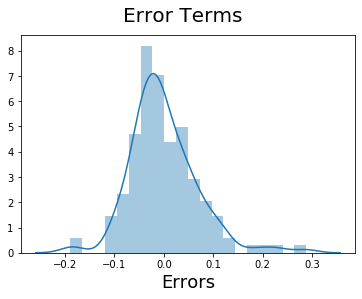

In [409]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
# X-label
plt.xlabel('Errors', fontsize = 18)                         
plt.show()

## STEP 5: Making Predictions

In [410]:
numerical_vars = ['boreratio', 'carheight', 'compressionratio', 'curbweight','enginesize', 'horsepower', 'peakrpm', 'price', 'stroke', 'wheelbase']

# transforming test data
cars_df_test[numerical_vars] = scaler.transform(cars_df_test[numerical_vars])

/home/niranjan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/niranjan/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [411]:
y_test = cars_df_test.pop('price')
X_test = cars_df_test

In [412]:
# Now let's use our final model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_model13.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [413]:
# Making predictions
y_pred = lm_13.predict(X_test_new)

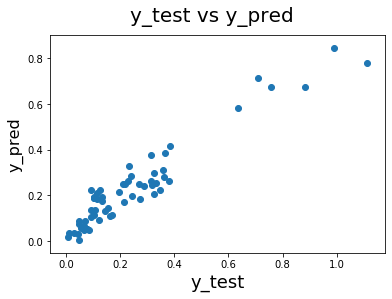

In [414]:
# Plotting y_test and y_pred
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [415]:
from sklearn.metrics import r2_score

In [416]:
# check the rsquare with sklearn
print(r2_score(y_test, y_pred))

0.8867238906208083


### rsquare from statsmodel and sklearn is quite close.

## STEP 6: Conclusion

Our deciding factors would be -

1. wheelbase    
2. horsepower    
3. Luxury
4. carbody_hatchback